In [1]:
import os, sys
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/24 15:44:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/24 15:44:23 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# 변수의 성격

빅데이터는 통계와 같은 이전의 방식으로 분석하기에는 잘 맞지 않는 대규모이거나 복잡한 성격의 데이터를 말한다.

데이터는 숫자, 텍스트로 구분할 수 있다. 숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다. 반면에 텍스트는 분석하기 어려울 수 밖에 없고, 어떻게든 정량화하기 위해 단어의 빈도로 변환하고 있다.

측정하는 변수는 크게 나누면 다음과 같다.

(1) 명목변수 Nominal varaible는 남녀 성별과 같이 순서가 없이 이름이 있는 변수를 말한다. 검은색, 흰색, 파란색 등의 색이나 종로구, 영등포구 등 지역구가 명목변수의 예가 된다.

(2) 순위변수 Ordinal variable은 어떤 순서가 있는 범주에 속하여 그 범주의 이름을 말한다. '초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다. 소득수준을 '차상위', '중위', '상위'로 구분하면 순위변수에 해당된다.

(3) 여기서 범주를 등간격으로 간격변수 Interval variable이라고 한다. 자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

(4) 키, 몸무게와 같이 연속 변수 Continuous variable이 있다.

통계에서는 변수의 성격에 따라 적용되는 분석의 방법이 다를 수 밖에 없다. 예를 들어:

이산 값인 경우 이산분포 (주사위를 던져서 나오는 수)
빈도인 경우 포아송분포 (이산분포의 한 종류로 볼 수 있고, 단위 시간 또는 단위 공간에서 발생하는 횟수를 나타낸다. 예를 들면 특정시간에 도착하는 버스 수)
연속 값인 경우 정규분포로 모델링하여 평균, 표준편차, 확률 등의 통계량을 계산할 수 있다.

# 샘플링

### 무작위 수
통계에 무작위 수는 빼놓을 수 없는데, 분포는 무작위 수로부터 만들어 지고, 확률이 계산된다.

In [7]:
import random

random.seed(3) #시드수를 지정하면 무작위 숫자가 정해짐. 시드를 지정안하면 운영체제의 시간을 가져가 진짜 무작위 수가 만들어진다.
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


In [6]:
#random.seed()
random.seed()
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.563623950541005
2nd random number on the basis of the seed 0.37260990067152633


In [9]:
# Numpy

import numpy as np

# 균등분포 상에서 무작위 숫자 만들기
print (np.random.random((3,2)))

[[0.55475619 0.12333716]
 [0.28483135 0.05630234]
 [0.1840477  0.25909925]]


In [10]:
# 정규분포 상에서 무작위 숫자 만들기
np.random.randn()

-0.6071890745714797

23/11/24 17:05:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

	at scala.concurrent.Future$InternalCallbackExecutor$.execute(Future.scala:873)
	at scala.concurrent.impl.CallbackRunnable.executeWithValue(Promise.scala:72)
	at scala.concurrent.impl.Promise$DefaultPromise.$anonfun$tryComplete$1(Promise.scala:288)
	at scala.concurrent.impl.Promise$DefaultPromise.$anonfun$tryComplete$1$adapted(Promise.scala:288)
	at scala.concurrent.impl.Promise$DefaultPromise.tryComplete(Promise.scala:288)
	at scala.concurrent.Promise.trySuccess(Promise.scala:94)
	at scala.concurrent.Promise.trySuccess$(Promise.scala:94)
	at scala.concurrent.impl.Promise$DefaultPromise.trySuccess(Promise.scala:187)
	at org.apache.spark.rpc.netty.NettyRpcEnv.onSuccess$1(NettyRpcEnv.scala:225)
	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$askAbortable$5(NettyRpcEnv.scala:239)
	at org.apache.spark.rpc.netty.NettyRpcEnv.$anonfun$askAbortable$5$adapted(NettyRpcEnv.scala:238)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at org.apache.spark.util.ThreadUtils$$anon$1

	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$register(BlockManagerMasterEndpoint.scala:648)
	at org.apache.spark.storage.BlockManagerMasterEndpoint$$anonfun$receiveAndReply$1.applyOrElse(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:103)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.process(Inbox.scala:100)
	at org.apache.spark.rpc.netty.MessageLoop.org$apache$spark$rpc$netty$MessageLoop$$receiveLoop(MessageLoop.scala:75)
	at org.apache.spark.rpc.netty.MessageLoop$$anon$1.run(MessageLoop.scala:41)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor

23/11/24 17:06:01 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:06:21 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:06:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:06:41 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:06:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:07:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:07:11 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:07:21 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:07:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:07:41 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:07:51 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:08:01 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:08:11 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:08:21 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:08:31 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:08:41 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/11/24 17:08:51 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:09:01 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2088)
	at org.apache.spark.Heartbeater$$anon$1.run(Heartbeater.scala:46)
	at java.base/j

23/11/24 17:09:11 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

In [20]:
# 평균 0, 표준편차 1을 가지는 정규분포에서 200개 샘플
comp1=np.random.normal(0, 1, size=200)

# 평균 10, 표준편차 2, 샘플은 200의 정규분포를 생성
comp2=np.random.normal(10, 2, size=200)

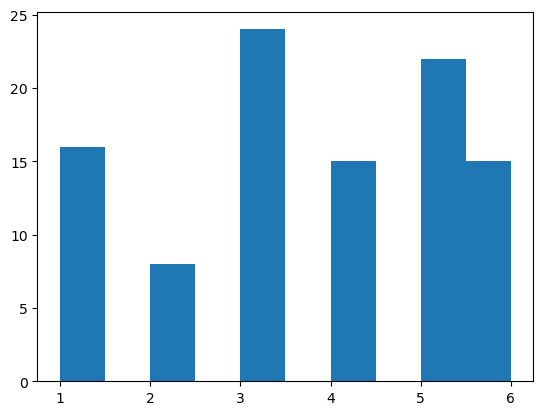

In [21]:
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))

import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

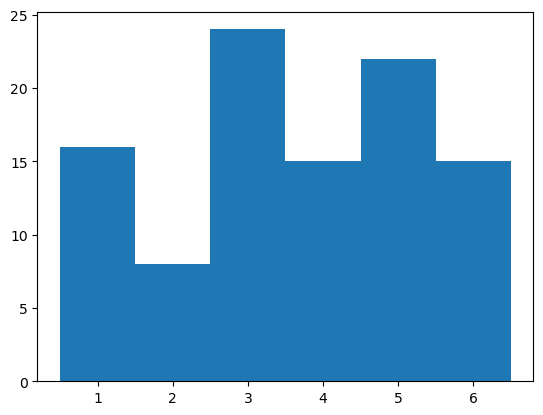

In [22]:
plt.hist(dice, bins = np.arange(0.5, 7))
plt.show()

<AxesSubplot:>

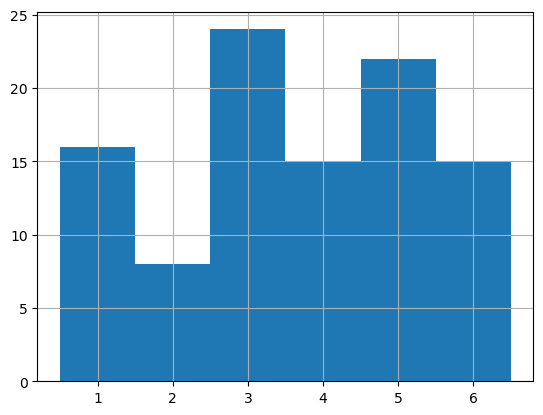

In [23]:
# Pandas로 그리기

import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

# 히스토그램

정규분포에서 무작위 샘플을 추출하는 randn()을 사용해서 histogram 그래프를 그려보자. 정규분포 샘플을 무작위로 100개 생성해보자.

In [24]:
x=np.random.randn(100)
count, binends = np.histogram(x)
print(count)
print(binends)

[ 3 10 16 15 21 16  9  5  4  1]
[-2.24085641 -1.7134083  -1.18596019 -0.65851207 -0.13106396  0.39638415
  0.92383226  1.45128037  1.97872848  2.50617659  3.0336247 ]


(array([ 3., 10., 16., 15., 21., 16.,  9.,  5.,  4.,  1.]),
 array([-2.24085641, -1.7134083 , -1.18596019, -0.65851207, -0.13106396,
         0.39638415,  0.92383226,  1.45128037,  1.97872848,  2.50617659,
         3.0336247 ]),
 <BarContainer object of 10 artists>)

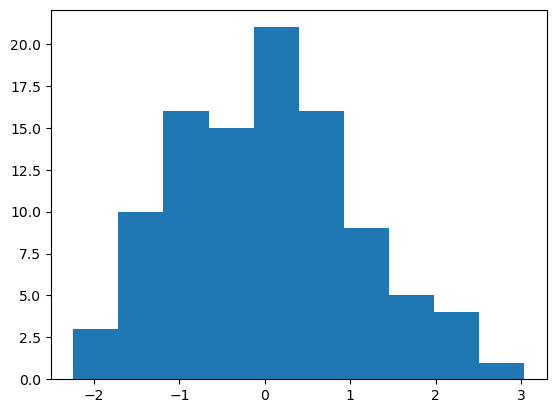

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

<AxesSubplot:>

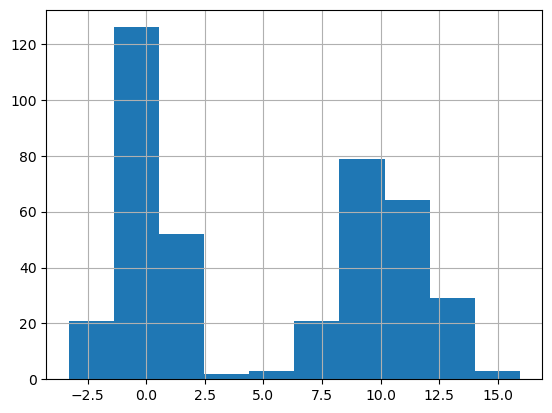

In [26]:
# 정규분포 두개를 Series로 만들어 만들기

values=pd.Series(np.concatenate( [comp1,comp2]))
values.hist()

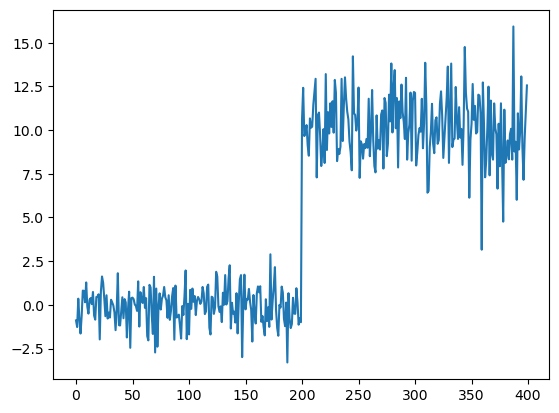

In [27]:
values.plot()
plt.show()

# 문제 S-1: 년도별 빈도 히스토그램
빈도와 날자가 저장된 데이터에서 막대그래프를 그려보자. 아래 데이터의 첫 컬럼은 빈도, 둘째 컬럼은 날자이다. 막대그래프는 histogram, barchart를 선택할 수 있다.

histogram은 한 변수(컬럼)의 빈도수.
barchart는 두 변수간의 그래프.

In [28]:
data = """30 14-11-2003
10 15-03-2004
12 04-12-2012
33 09-05-2007
44 16-08-2005
55 25-07-2001
76 31-12-2011
87 25-06-2009
118 16-02-2006
119 10-02-2000
145 03-05-2014"""

In [29]:
import datetime

yvalues = []
xdates = []
for line in data.split("\n"):
    x, y = line.split()
    yvalues.append(int(x))
    xdates.append(datetime.datetime.strptime(y, "%d-%m-%Y").date())

<BarContainer object of 11 artists>

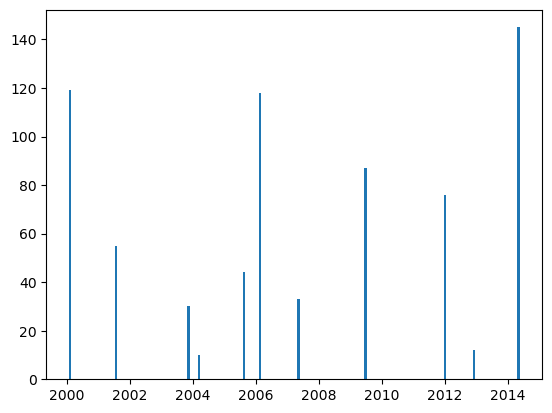

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111) #3개의 숫자
ax.bar(xdates, yvalues, width=30)

### boxplot
전체 관측값을 정렬하고, 전체를 4분위로 나누면 IQR Interquatile Range을 구할 수 있다. 
Boxplot은 IQR의 Q1~Q3을 사각형으로 표시한다. pandas를 이용하거나, matplotlib으로 Boxplot을 그릴 수 있다. 
사각형의 주황색 선은 평균을 말한다.

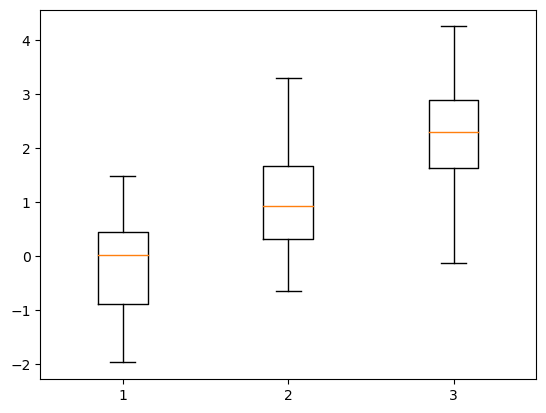

In [48]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # mu=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()

# 중심극한정리
무작위로 평균 , 표준편차, 모집단이 있다고 하자. 모집단의 평균과 표준편차는 계산할 방법이 없어서 알 수가 없다. 표본을 추출하면, 모집단의 평균을 구할 수 있고, 모집단의 표준편차는 표본의 표준편차를 크기로 나누어 계산할 수 있다

In [32]:
x=np.random.randn(100)
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

# 정규분포는 평균, 모드, 최빈값이 같아야 한다. 
# 아래는 평균은 0에 가깝고, 최빈값과 다소 차이가 있다. 정규분포의 솟거나, 퍼진 모양이 다르기 때문이다.

mean	: 0.060689233435796935
median	: -0.11510628732322738


### skewness
분포의 대칭성을 설명하는 지표로 skewness를 계산한다.  
= 0 : 정규분포  
&lt; 0 : +이면 +방향으로 꼬리가 있다. 왼쪽으로 피크가 있다.  
&gt; 0 : -이면 -방향으로 꼬리가 있다. 오른쪽으로 피크가 있다.  

In [33]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: 0.2385288503195637


### kurtosis
kurtosis는 분포의 뾰족한 정도를 설명한다.
= 0 : 정규분포  
&lt; 0 : 뾰족, 꼬리가 두툼
&gt; 0 : 편평, 꼬리가 얇음

In [34]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: 0.0714438004616249


## Spark DF with numpy array

In [37]:
import pandas as pd

x=np.random.randn(100)
xPd=pd.DataFrame(x, columns=['x'], dtype=float)


In [39]:
from pyspark.sql import functions as functions

# df=spark.createDataFrame(xPd)

# df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

### 평균

In [44]:
print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

xbar=np.mean(X)
print ("numpy mean of X = {:.3f}".format(xbar))

simple mean of x = -0.060
numpy mean of X = -0.060


### 분산

분산 variance나 표준편차 Standard Deviation은 평균으로부터 얼마나 멀리 떨어져 또는 흩어져 분포하는지 알려주는 값이다.

- 분산은 평균에서 관측값을 뺀 차이값을 제곱한 후, n으로 나누어 평균을 계산한다. 제곱을 하지 않고 차이값을 더하면 0이 나오므로 제곱을 한다.
- 분산을 제곱근하면 표준편차가 된다.
- 분산보다는 표준편차가 더 자주 사용된다.

In [45]:
X=x

#식으로 표현하기
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

0.9602858529822947


In [46]:
# 자유도 반영
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

0.9651235957056545


In [47]:
# Numpy로 계산하기

print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

0.960285852982295
0.9651235957056546


### Z-Score (Nomalization)

표준편차의 배수로 떨어진 정도를 정규화(표준화) 할 때 사용하는 지표

In [49]:
# 계산식

import numpy as np

xbar=np.mean(X)
sigmax=np.std(X) #ddof=0
sx=np.std(X,ddof=1)
for x in X:
    #zscore=(x-xbar)/sx
    zscore=(x-xbar)/sigmax
    print (zscore, end= ' ')

0.28894319954075576 0.48994713455480726 -0.8647090729049615 -1.9989417049849068 -0.1101438808286719 1.0572328196201912 -0.9207748750020068 0.8169259796956264 0.6573131849397418 -0.20660824539848913 -1.2994557320477396 -0.45796455822238513 0.20871303130541902 0.7000134379598231 -0.805263317144137 -0.8353940944731141 2.022671962134407 -1.0479013227155491 -0.43593370662778985 -0.9147166780503968 -0.38800591768745063 1.155466155047204 -2.027983490928696 -0.355374218521076 -1.433726246856301 1.1371362336429984 0.07827049813055685 -1.683814413959942 -0.25950286418194635 -0.23584179821817594 0.7014256192943231 -0.2646923729939054 0.5626019662914712 0.7896891620809198 -1.2919894023241216 1.168388488627053 -0.11744590563492421 0.6981021514002228 1.999623111735511 -1.7745431781422316 0.44006407792149477 -0.4485542583395532 -1.0468928428688136 -1.3570815527412934 0.47217408475066547 1.1767255752564787 -0.4101329436158406 -0.15250627424010718 0.24115372158279597 -1.0264891160124103 -0.365626797218

In [50]:
# zscore()는 scipy.stats에서 제공하고 있다.

from scipy import stats
stats.zscore(X)

array([ 0.2889432 ,  0.48994713, -0.86470907, -1.9989417 , -0.11014388,
        1.05723282, -0.92077488,  0.81692598,  0.65731318, -0.20660825,
       -1.29945573, -0.45796456,  0.20871303,  0.70001344, -0.80526332,
       -0.83539409,  2.02267196, -1.04790132, -0.43593371, -0.91471668,
       -0.38800592,  1.15546616, -2.02798349, -0.35537422, -1.43372625,
        1.13713623,  0.0782705 , -1.68381441, -0.25950286, -0.2358418 ,
        0.70142562, -0.26469237,  0.56260197,  0.78968916, -1.2919894 ,
        1.16838849, -0.11744591,  0.69810215,  1.99962311, -1.77454318,
        0.44006408, -0.44855426, -1.04689284, -1.35708155,  0.47217408,
        1.17672558, -0.41013294, -0.15250627,  0.24115372, -1.02648912,
       -0.3656268 , -0.8519714 ,  1.34676312, -0.22282742,  0.00880861,
        0.48639961, -1.10532761, -0.08490803,  1.6278788 , -1.47848328,
        1.96757161,  2.39982225,  0.88196788,  0.94923211, -1.40462985,
       -0.69172726, -0.60755018,  0.44372276, -0.87204803, -0.19

### cdf - 누적확률계산
추론통계에서 확률을 계산하는 것은 중요하다. p-value와 신뢰구간의 계산에 필요하다. 
cdf Cumulative Distribution Function은 누적확률을 의미한다. 
정규분포에서 평균 loc=0, 표준편차 scale=1을 기본 값으로, cdf(0)은 '0'또는 그 이하의 값을 누적한 확률을 말한다.

In [51]:
from scipy.stats import norm

norm.cdf(0, loc=0, scale=1)

0.5

In [52]:
 norm.cdf(1) - norm.cdf(-1) #모집단의 68.27

0.6826894921370859

In [53]:
norm.cdf(2) - norm.cdf(-2) #모집단 95%

0.9544997361036416

### tscore
표본의 크기가 크면 모집단과 차이가 없는데, 표본이 작으면 어떻게 될까? 이 경우 사용하는 것이 t분포이다.   
t분포는 정규분포와 유사한 모양을 가지고 있지만, 꼬리가 두툼한 특징을 가지고 있다.    
따라서 평균에서 멀어진 값을 샘플링할 확률이 높아지게 된다. n이 일정 규모로 커지면 t분포와 정규분포와 유사하게 된다.   

In [54]:
from scipy.stats import t

t.cdf(1, 1) # dof 1

0.7500000000000002

# Outlier

정규분포를 따른다고 했을 경우, 분포의 표준편차 범위 -3 ~ 3안에 99.7%가 포함되고 그 밖의 값은 0.3%에 불과하여 발생하기 극히 어렵다. 이러한 일정 범위를 넘어선 값은 이상값이다.   

이상값은 분석에 영향을 미치며, 몸무게-키의 회귀분석선을 생각해보면 이상 몸무게는 선을 틀어지게 한다.

In [56]:
import numpy as np

def filterOutliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

d = [2,4,5,1,6,5,40]
filtered_d = filterOutliers(d)
print (filtered_d)


# 40은 Outlier로 판단하여 전처리하여 제외한다.

[2, 4, 5, 1, 6, 5]
